In [41]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [2]:
train = pd.read_csv('stevens.csv')
train.head()

,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
0,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
1,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
4,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1


In [3]:
LE = LabelEncoder()
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = LE.fit_transform(train[col])

In [4]:
train.head()

,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
0,62,1994,3,4,1,1,1,0,1
1,68,1994,10,4,1,1,1,0,1
2,69,1994,6,4,1,1,1,0,1
3,144,1994,2,4,1,1,0,0,1
4,96,1995,8,8,1,1,0,0,1


In [14]:
X_train = train.drop('Reverse', axis=1)
y_train = train['Reverse']
model = DecisionTreeClassifier(max_depth= 3).fit(X_train, y_train)
AUC = model.score(X_train, y_train)
print (AUC)


0.6978798586572438


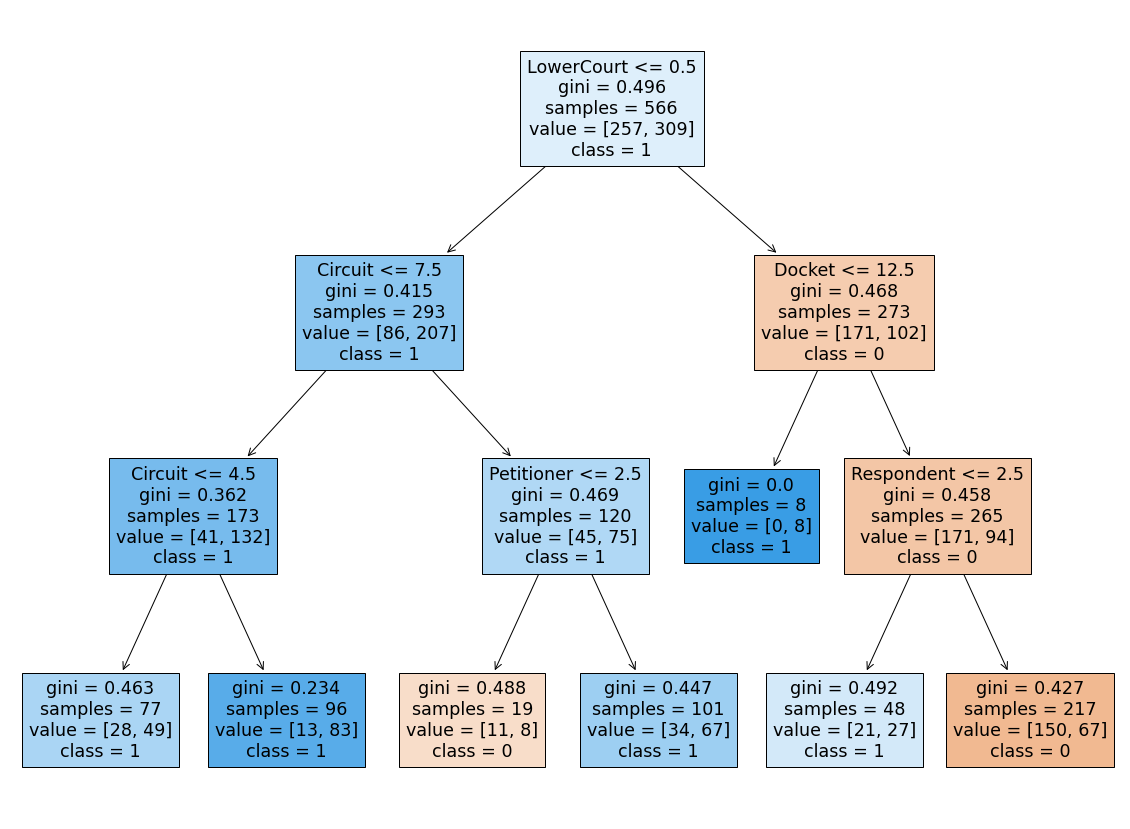

In [18]:
# print the tree
plt.figure(figsize=(20,15))
plot_tree(model,feature_names=X_train.columns,class_names=['0','1'],filled=True)
plt.show()


In [20]:
# use sklearn do the cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train, y_train, cv=5)
score.mean()

0.6449309113491694

In [57]:
from sklearn.model_selection import KFold
score_contain = []
kf = KFold(n_splits=10)
for i in range(1,10):
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        model_fold = DecisionTreeClassifier(max_depth= i).fit(X_train_fold, y_train_fold)
        score_fold = model_fold.score(X_test_fold, y_test_fold)
        score_contain.append(score_fold)
    print('Depth = '+str(i) + ': Accuarcy = ' + format(np.mean(score_contain), '.3f'))
    

Depth = 1: Accuarcy = 0.668
Depth = 2: Accuarcy = 0.662
Depth = 3: Accuarcy = 0.658
Depth = 4: Accuarcy = 0.650
Depth = 5: Accuarcy = 0.646
Depth = 6: Accuarcy = 0.639
Depth = 7: Accuarcy = 0.635
Depth = 8: Accuarcy = 0.633
Depth = 9: Accuarcy = 0.630
